In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

In [34]:
def summary(name, burn):
    baseline = pd.read_csv(f"En2Ch/{name}-burn-{burn}/eval.results", sep='\t', index_col=0)
    aux_baseline = pd.read_csv(f"En2Pinyin/{name}-str-burn-{burn}/eval.results", sep='\t', index_col=0)
    if name == "dict":
        table_all = pd.DataFrame(columns=["ACC-dev", "ACC-test", "ACC-ACT-test", "ACC-Pinyin-test"],
                                 index=["seq2seq (Baseline, mtr=1)"] + [f"mtr=0.{10-i}" for i in range(1, 10)])
        table_all.loc["seq2seq (Baseline, mtr=1)"] = [baseline.loc["Valid"]["ACC"], baseline.loc["Test"]["ACC"], 
                                                      baseline.loc["Test"]["ACC-ACT"], -1]
        for i in range(1, 10):
            exp = pd.read_csv(f"En2Ch+Pinyin_str/{name}/{name}-mtr-0.{i}-burn-{burn}/eval.results", sep='\t', index_col=0)
            table_all.loc[f"mtr=0.{i}"] = [exp.loc["Valid"]["ACC"], exp.loc["Test"]["ACC"], 
                                           exp.loc["Test"]["ACC-ACT"], exp.loc["Test"]["ACC-aux"]]
        table_all.loc["seq2seq (Pinyin-baseline, mtr=0)"] = [-1, -1, -1, aux_baseline.loc["Test"]["ACC"]]
    elif name == "news":
        table_all = pd.DataFrame(columns=["ACC-dev", "ACC-test", "ACC+(test)", "ACC-ACT-test", "ACC-Pinyin-test"],
                                 index=["seq2seq (Baseline, mtr=1)"] + [f"mtr=0.{10-i}" for i in range(1, 10)])
        table_all.loc["seq2seq (Baseline, mtr=1)"] = [baseline.loc["Valid"]["ACC"], baseline.loc["Test"]["ACC"], 
                                                      baseline.loc["Test"]["ACC+"], baseline.loc["Test"]["ACC-ACT"], -1]
        for i in range(1, 10):
            exp = pd.read_csv(f"En2Ch+Pinyin_str/{name}/{name}-mtr-0.{i}-burn-{burn}/eval.results", sep='\t', index_col=0)
            table_all.loc[f"mtr=0.{i}"] = [exp.loc["Valid"]["ACC"], exp.loc["Test"]["ACC"], exp.loc["Test"]["ACC+"],
                                           exp.loc["Test"]["ACC-ACT"], exp.loc["Test"]["ACC-aux"]]
        table_all.loc["seq2seq (Pinyin-baseline, mtr=0)"] = [-1, -1, -1, -1, aux_baseline.loc["Test"]["ACC"]]
    return table_all

In [4]:
dict_sum = summary("dict", 0)

In [32]:
dict_sum.iloc[[0, -1]].append(dict_sum[dict_sum["ACC-dev"] == dict_sum.max(axis=0)["ACC-dev"]]).to_csv("dict_exps_summary.csv")

In [35]:
news_sum = summary("news", 10)

In [36]:
news_sum.iloc[[0, -1]].append(news_sum[news_sum["ACC-dev"] == news_sum.max(axis=0)["ACC-dev"]]).to_csv("news_exps_summary.csv")

In [86]:
def summary_dev(name, burn):
    baseline = pd.read_csv(f"En2Ch/{name}-burn-{burn}/eval.results", sep='\t', index_col=0)
    aux_baseline = pd.read_csv(f"En2Pinyin/{name}-str-burn-{burn}/eval.results", sep='\t', index_col=0)
    table_all = pd.DataFrame(columns=["ACC", "ACC-ACT", "ACC-Pinyin"],
                             index=["seq2seq (Baseline, 1)"] + [f"0.{10-i}" for i in range(1, 10)])
    table_all.loc["seq2seq (Baseline, 1)"] = [baseline.loc["Valid"]["ACC"], baseline.loc["Valid"]["ACC-ACT"], -1]
    for i in range(1, 10):
        exp = pd.read_csv(f"En2Ch+Pinyin_str/{name}/{name}-mtr-0.{i}-burn-{burn}/eval.results", sep='\t', index_col=0)
        table_all.loc[f"0.{i}"] = [exp.loc["Valid"]["ACC"], exp.loc["Valid"]["ACC-ACT"], exp.loc["Valid"]["ACC-aux"]]
    table_all.loc["seq2seq (Pinyin-baseline, 0)"] = [-1, -1, aux_baseline.loc["Valid"]["ACC"]]
    return table_all

In [100]:
name = "news"
burn = 10
dev = summary_dev(name, burn=burn).astype(float).round(3)
print(dev.round(3).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    ACC &  ACC-ACT &  ACC-Pinyin \\
\midrule
seq2seq (Baseline, 1)        &  0.665 &    0.686 &      -1.000 \\
0.9                          &  0.649 &    0.673 &       0.671 \\
0.8                          &  0.673 &    0.692 &       0.698 \\
0.7                          &  0.657 &    0.676 &       0.686 \\
0.6                          &  0.673 &    0.696 &       0.682 \\
0.5                          &  0.663 &    0.686 &       0.694 \\
0.4                          &  0.686 &    0.704 &       0.702 \\
0.3                          &  0.669 &    0.694 &       0.708 \\
0.2                          &  0.669 &    0.688 &       0.688 \\
0.1                          &  0.676 &    0.692 &       0.698 \\
seq2seq (Pinyin-baseline, 0) & -1.000 &   -1.000 &       0.696 \\
\bottomrule
\end{tabular}



In [101]:
dev[dev == dev.max(axis=0)]

,ACC,ACC-ACT,ACC-Pinyin
"seq2seq (Baseline, 1)",NaN,NaN,NaN
0.9,NaN,NaN,NaN
0.8,NaN,NaN,NaN
0.7,NaN,NaN,NaN
0.6,NaN,NaN,NaN
0.5,NaN,NaN,NaN
0.4,0.686,0.704,NaN
0.3,NaN,NaN,0.708
0.2,NaN,NaN,NaN
0.1,NaN,NaN,NaN


In [97]:
dev[["ACC", "ACC-Pinyin"]]

,ACC,ACC-Pinyin
"seq2seq (Baseline, 1)",0.725,-1.000
0.9,0.725,0.742
0.8,0.689,0.710
0.7,0.723,0.737
0.6,0.729,0.743
0.5,0.720,0.740
0.4,0.726,0.742
0.3,0.674,0.698
0.2,0.690,0.706
0.1,0.721,0.742


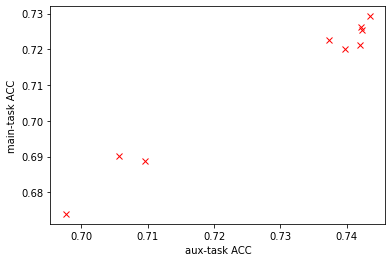

In [98]:
x = summary_dev(name, burn=burn)[["ACC-Pinyin"]].iloc[1:-1]
y = summary_dev(name, burn=burn)[["ACC"]].iloc[1:-1]
plt.plot(x, y, 'rx')
plt.ylabel("main-task ACC")
plt.xlabel("aux-task ACC")
plt.show()

In [99]:
pearsonr(x.squeeze(1), y.squeeze(1))

(0.9901938192315407, 3.045361913371948e-07)